# Logistic Regression #

Dataset Context
application_record : contains all the information about user properties like gender, income, age, employment length, etc. while all the columns pretty self explanatory, the column which contains data like ages and employment length having negative value, which tells how much days they're born or start to work until this day.

credit_record : contains all the information about user activity, month balance is the month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on, and status column tells information like so:

0: 1-29 days past due

1: 30-59 days past due

2: 60-89 days overdue

3: 90-119 days overdue

4: 120-149 days overdue

5: Overdue or bad debts, write-offs for more than 150 days

C: paid off that month

X: No loan for the month

## Import libraries ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

### Loading application_record.csv as df ###

In [3]:
df = pd.read_csv('/Users/rameshchidurala/Documents/DSC-520 Assignments/archive-7/application_record.csv')

## Exploratory analysis ##

In [4]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df.shape

(438557, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
df['ID'].duplicated().sum()

47

In [8]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [9]:
df.shape

(438510, 18)

In [10]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [12]:
# OHE - CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE

In [13]:
df['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [14]:
df['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [15]:
df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [17]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

1. Academic degree
2. Higher education
3. Incomplete higher
4. Secondary / secondary special
5. Lower secondary

In [18]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [19]:
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [20]:
df['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    438510
Name: count, dtype: int64

In [21]:
df['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [22]:
df['FLAG_PHONE'].unique()

array([0, 1])

In [23]:
df['FLAG_EMAIL'].unique()

array([0, 1])

In [24]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [25]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [26]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [27]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-23642.00,-23413.00,-23181.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-9655.00,-9343.0,-9011.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-9533.00,-8486.00,-7792.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0


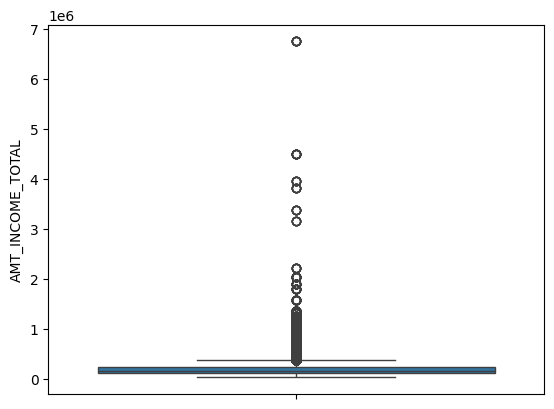

In [28]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

plt.show()

<Axes: ylabel='CNT_CHILDREN'>

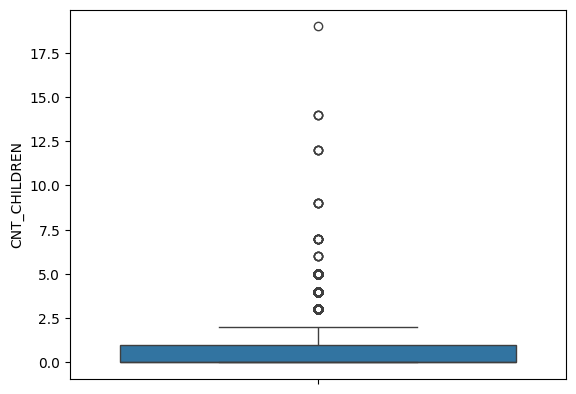

In [29]:
sns.boxplot(data=df, y=df['CNT_CHILDREN'])

In [30]:
df['DAYS_EMPLOYED'].max()

365243

<Axes: ylabel='DAYS_BIRTH'>

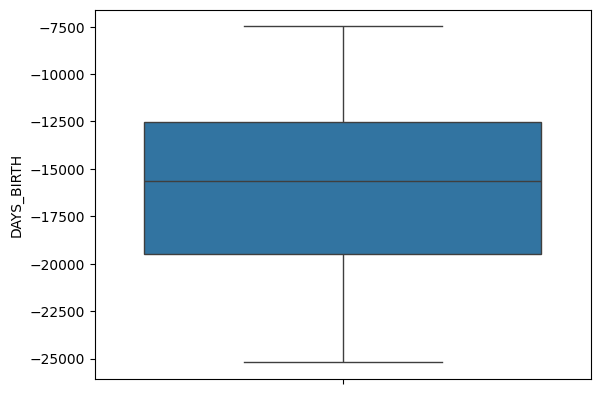

In [31]:
sns.boxplot(data=df, y=df['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

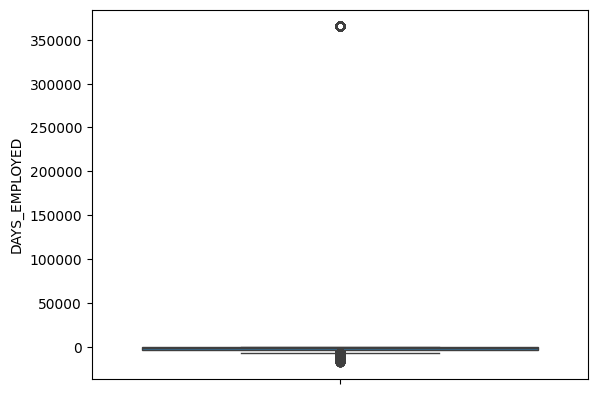

In [32]:
sns.boxplot(data=df, y=df['DAYS_EMPLOYED'])

In [33]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    75324
Name: count, dtype: int64

In [34]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [35]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
0    75324
Name: count, dtype: int64

In [36]:
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365.2425,0)


In [37]:
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [38]:
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [39]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,23.00,25.00,26.00,26.00,27.00,29.0,34.00,43.00,53.00,60.0,63.00,63.00,64.0,65.00,66.00,69.0
YEARS_EMPLOYED,438510.0,5.956069e+00,6.574244,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,4.00,8.00,14.0,20.00,21.00,23.0,26.00,30.00,48.0


In [40]:
df['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

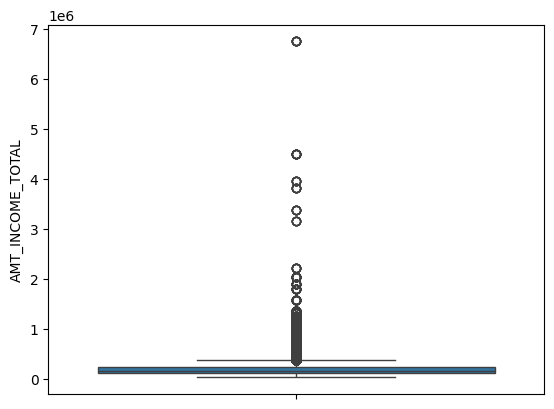

In [41]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

In [42]:
df[df['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [43]:
# OHE - CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE

In [44]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)


In [45]:
columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [46]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale]) 

In [47]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [48]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-0.589595,-0.477117,-1.331336,1.586974,-0.905971,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
438553,6840222,-0.589595,-0.763249,-1.331336,0.017048,0.310900,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,-0.589595,-1.212884,-1.331336,-1.901750,-0.753862,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,-0.589595,-1.049381,-0.216747,1.325320,-0.905971,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
df1 = pd.read_csv('/Users/rameshchidurala/Documents/DSC-520 Assignments/archive-7/credit_record.csv')

In [50]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [51]:
df1.shape

(1048575, 3)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [53]:
df1.duplicated().sum()

0

In [54]:
df1['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [55]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [56]:
df1[df1['STATUS'].isin(['X', 'C'])]


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [57]:
df1['ID'].nunique()

45985

In [58]:
df1['target']=df1['STATUS']
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)
df1['target']=df1['target'].astype(int)
df1.loc[df1['target']>=1,'target']=1


Target value is for the risk associated with the approval of the credit card, where 0 implies low risk and 1 implies high risk in approving the credit card.

In [59]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()

In [60]:
df2.sample(10)

,ID,target
682,5002591,0
5148,5011211,0
39999,5125822,0
3264,5008844,0
22834,5065540,0
18234,5052687,0
30278,5095088,1
18928,5053572,0
22105,5062024,0
25924,5078754,0


In [61]:
df2["target"].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [62]:
new_df=pd.merge(df, df2, how='inner', on=['ID'])

In [63]:
new_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-0.216747,0.278703,0.158791,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
36453,5149834,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
36454,5149838,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
36455,5150049,-0.589595,0.871790,-0.216747,0.453139,-0.601753,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [64]:
# Extract how many months account has been open for
start_df=pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_75400/4079768458.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  start_df=pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()


In [65]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [66]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [67]:
new_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified,target,ACCOUNT_LENGTH
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,1,1,15
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,1,1,14
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,1,0,0,0,29
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,1,0,0,0,0,0,4
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,-0.589595,1.157921,-0.216747,0.278703,0.158791,0,1,0,1,...,0,0,0,0,0,0,0,0,1,11
36453,5149834,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,1,0,0,0,0,0,0,0,1,23
36454,5149838,-0.589595,-0.272737,-0.216747,-0.855133,-0.297536,1,0,1,0,...,1,0,0,0,0,0,0,0,1,32
36455,5150049,-0.589595,0.871790,-0.216747,0.453139,-0.601753,1,0,1,0,...,0,0,0,1,0,0,0,0,1,9


In [68]:
new_df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUS

In [69]:
new_df.drop(columns=["ID"],inplace=True)

# Building and evaluating model #

Prediction Objective
The logistic regression model will predict the probability of a creadit card being approved or not , based on various features in the dataset. These features include demographics, financial information, employment details, and other relevant variables.

In [71]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x = new_df.drop(columns=['target'])
y = new_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,stratify=y,random_state=0)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(x_train, y_train)


# Predict on the test data
y_pred = logistic_model.predict(x_test)

print("Predictions:", y_pred)

# Evaluate the model performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)




Predictions: [0 0 0 ... 0 0 0]
Confusion Matrix:
 [[9651    0]
 [1287    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9651
           1       0.00      0.00      0.00      1287

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.78      0.88      0.83     10938



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_

## Re-building model using glm () method ##
Define the Formula for the GLM
In logistic regression, the target variable should be binary (typically 0 and 1), and we will be using the other features as predictors. The formula in a GLM context is usually expressed as:
logit(P(Y=1))=β0+β1X1+β2X2+...+βnXnlogit(P(Y=1))=β0+β1X1+β2X2+...+βnXn
where P(Y=1)P(Y=1) is the probability of the target being 1, β0β0 is the intercept, β1,β2,...,βnβ1,β2,...,βn are the coefficients for each predictor X1,X2,...,XnX1,X2,...,Xn.


In [72]:
import statsmodels.api as sm
# Adding a constant to X_train for the GLM model in statsmodels
x_train_sm = sm.add_constant(x_train)

# Fit the GLM model using statsmodels
glm_model = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Display the summary of the model
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                25519
Model:                            GLM   Df Residuals:                    25471
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9112.7
Date:                Wed, 10 Jan 2024   Deviance:                       18225.
Time:                        12:02:16   Pearson chi2:                 2.76e+04
No. Iterations:                   100   Pseudo R-squ. (CS):            0.01046
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

Coefficients (coef)
These values represent the change in the log odds of the target being '1' (loan approved) for a one-unit change in the predictor variable, assuming all other variables are held constant.
For example, CNT_CHILDREN has a coefficient of -1.2811, meaning that for each additional child, the log odds of loan approval decreases by 1.2811, all else being equal.
P-values (P>|z|)
P-values test the hypothesis that each coefficient is different from 0 (no effect). A low p-value (< 0.05) suggests that you can reject the null hypothesis that the coefficient is zero.
For instance, CNT_CHILDREN has a p-value of 0.000, which is very low, indicating that this variable is a significant predictor of loan approval.
On the other hand, YEARS_EMPLOYED has a p-value of 0.672, suggesting that it's not a statistically significant predictor in this model.
Interpretation of Significant Variables
CNT_CHILDREN: The negative coefficient suggests that applicants with more children are less likely to have their loans approved.
AMT_INCOME_TOTAL: A positive coefficient indicates that higher income is associated with a greater likelihood of loan approval.
CNT_FAM_MEMBERS: Also has a positive effect on loan approval chances.
AGE_YEARS: The negative coefficient implies that older applicants might have a slightly lower chance of loan approval.
CODE_GENDER_F and CODE_GENDER_M: Gender seems to play a significant role, with different impacts for females and males.
Non-Significant Variables
Some variables, like YEARS_EMPLOYED and certain occupation types, are not statistically significant (high p-values), suggesting they do not have a strong predictive power in this model. It might be worth considering removing or reevaluating these variables for model simplification and potentially better performance.
Model Fit and Other Metrics
The Deviance and Pearson chi2 statistics give you an idea of the goodness of fit. However, they don't provide a definitive measure like R-squared in linear regression.
The Pseudo R-squ. (CS) is a pseudo R-squared value, which gives an indication of the goodness of fit. In logistic regression, these values are less intuitive and less informative than in linear regression.


In [73]:
# Predict on the test data
y_pred = logistic_model.predict(x_test)

print("Predictions:", y_pred)

# Evaluate the model performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Predictions: [0 0 0 ... 0 0 0]
Confusion Matrix:
 [[9651    0]
 [1287    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9651
           1       0.00      0.00      0.00      1287

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.78      0.88      0.83     10938



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

The results of the model evaluation reveal several key points about its performance and potential issues:

1. Predictions
The model predicted all test instances as class 0 (no credit card approval). This is evident from the prediction output [0 0 0 ... 0 0 0].
2. Confusion Matrix
lua
Copy code
[[9651    0]
 [1287    0]]
True Negatives (TN): 9651 instances were correctly predicted as class 0.
False Negatives (FN): 1287 instances were class 1 but incorrectly predicted as class 0.
True Positives (TP): 0, indicating the model failed to identify any of the positive cases.
False Positives (FP): 0, since the model did not predict any instance as class 1.
3. Classification Report
Precision for Class 1: Undefined (0.00), as the model made no predictions for class 1.
Recall for Class 1: 0.00, indicating that the model failed to correctly identify any true positives.
F1-Score for Class 1: 0.00, a harmonic mean of precision and recall, also reflects poor performance for class 1.
Accuracy: 0.88, but this is misleading due to the imbalanced nature of the dataset (more instances of class 0).
4. Warnings
UndefinedMetricWarning: This warning is issued because the model did not predict any instances of class 1, leading to a division by zero when calculating precision and F1-score for this class.
Interpretation
Model Bias: Your model is heavily biased towards predicting class 0. This could be due to class imbalance in your dataset, where class 0 is more prevalent than class 1.
Class Imbalance: If class 1 instances are significantly fewer than class 0, the model may learn to always predict the majority class.
Model Sensitivity: The model lacks sensitivity to class 1. It's crucial to enhance the model's ability to detect class 1 instances, especially if they are of high importance (like loan approvals).
Suggestions for Improvement
Address Class Imbalance: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) for oversampling the minority class or undersample the majority class.

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Check the balance of the target classes
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0)))

# Create a logistic regression model
model_smote = LogisticRegression()

# Fit the model on the training data with SMOTE
model_smote.fit(x_train_smote, y_train_smote)

# Predict on the original test data
y_pred_smote = model_smote.predict(x_test)

# Evaluate the model performance
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Display the results
print("Confusion Matrix:\n", conf_matrix_smote)
print("\nClassification Report:\n", class_report_smote)


After SMOTE, counts of label '1': 22515
After SMOTE, counts of label '0': 22515
Confusion Matrix:
 [[9376  275]
 [1238   49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      9651
           1       0.15      0.04      0.06      1287

    accuracy                           0.86     10938
   macro avg       0.52      0.50      0.49     10938
weighted avg       0.80      0.86      0.82     10938



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The results after applying SMOTE show some improvements, but also highlight areas that still need addressing:

1. Balancing the Classes
The counts of labels '1' and '0' are equal after applying SMOTE, which means the class imbalance issue has been effectively addressed in the training dataset.
2. Confusion Matrix
[[9376  275]
 [1238   49]]
True Negatives (TN): 9376 instances of class 0 (no creadit card approval) were correctly identified.
False Positives (FP): 275 instances were incorrectly predicted as class 1 (credit card approval).
False Negatives (FN): 1238 instances of class 1 were incorrectly predicted as class 0.
True Positives (TP): 49 instances of class 1 were correctly predicted.
3. Classification Report
Precision for Class 1: Has improved slightly but is still low at 0.15. This means that of all the instances predicted as class 1, only 15% were actually class 1.
Recall for Class 1: Has increased to 0.03, indicating a slight improvement in identifying true positives for class 1, but it is still very low.
F1-Score for Class 1: Also remains low, reflecting the balance between precision and recall.
Accuracy: Stands at 0.87, similar to the previous model, but this metric is less informative due to the class imbalance.


1. Compare Predicted vs. Actual Values
You can create a dataframe that juxtaposes the actual and predicted values for easier comparison:

In [75]:

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_smote})
comparison_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the dataframe
print(comparison_df.head())


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


## Validate the Model ##


1.Produce a Gain and Lift Chart
Gain and lift charts are useful for evaluating the performance of classification models, especially in terms of how effectively the model identifies positive instances.

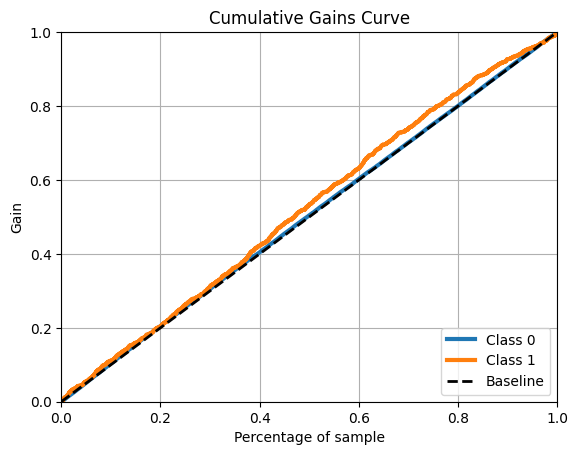

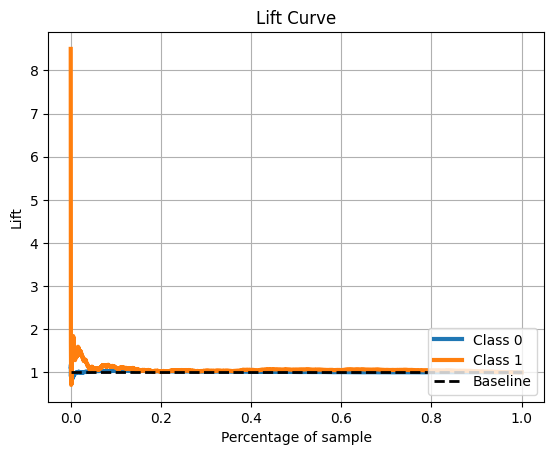

In [76]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate probabilities of the positive class
y_probas = model_smote.predict_proba(x_test)

# Gain and Lift Chart
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()


Cumulative Gains Chart:

The blue line (Class 0 - Low Risk) staying close to the baseline suggests that the model has limited ability to identify low-risk individuals beyond random chance across the entire sample population.
The orange line (Class 1 - High Risk) also follows closely to the baseline, indicating the model's similar limited capability in distinguishing high-risk individuals from low-risk ones throughout the sample.
Lift Chart:

The initial high lift for Class 0 implies that the model can somewhat effectively identify a small proportion of low-risk individuals compared to random selection. However, this effectiveness quickly diminishes as more of the population is sampled.
For Class 1, the lift chart does not show any significant advantage at any point, suggesting that the model is no better than random chance in identifying high-risk individuals.
Interpretation:

The model's performance in identifying low-risk individuals (Class 0) is slightly better than chance for a very small fraction of the dataset, but this advantage is lost as we consider more of the population.
In terms of identifying high-risk individuals (Class 1), the model does not show any significant predictive power, as evidenced by the lift chart.
Since the model's ability to predict high-risk individuals is crucial in risk management for credit card approvals, the current model's performance is not satisfactory.


2. Measure the Variation Inflation Factor (VIF)
VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A rule of thumb is that if VIF is greater than 10, multicollinearity may be influencing your estimates.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = x_train_smote.columns
vif_data['VIF'] = [variance_inflation_factor(x_train_smote.values, i) for i in range(x_train_smote.shape[1])]

print(vif_data)


                                              feature        VIF
0                                        CNT_CHILDREN  30.758695
1                                    AMT_INCOME_TOTAL   1.249495
2                                     CNT_FAM_MEMBERS  43.621031
3                                           AGE_YEARS   2.292902
4                                      YEARS_EMPLOYED   1.447038
5                                       CODE_GENDER_F  10.351676
6                                       CODE_GENDER_M   5.588731
7                                      FLAG_OWN_CAR_N   9.027800
8                                      FLAG_OWN_CAR_Y   5.599235
9                 NAME_EDUCATION_TYPE_Academic degree   1.013389
10               NAME_EDUCATION_TYPE_Higher education   3.642739
11              NAME_EDUCATION_TYPE_Incomplete higher   1.343209
12                NAME_EDUCATION_TYPE_Lower secondary   1.089221
13  NAME_EDUCATION_TYPE_Secondary / secondary special   8.433716
14                       

The Variation Inflation Factor (VIF) results show that there are several variables in the dataset with high multicollinearity. Remember, a VIF value greater than 10 suggests high multicollinearity which might be a concern. Let's examine these findings:

High VIF Variables
CNT_CHILDREN: VIF of 29.86 suggests significant multicollinearity.
CNT_FAM_MEMBERS: VIF of 42.14 is also very high.
CODE_GENDER_F and CODE_GENDER_M: Their VIFs are 10.22 and 5.55 respectively, indicating potential multicollinearity issues.
FLAG_OWN_CAR_N and FLAG_OWN_CAR_Y: VIFs of 9.28 and 5.74 suggest multicollinearity.
NAME_EDUCATION_TYPE_Secondary / secondary special: VIF of 8.42.
FLAG_OWN_REALTY_Y: VIF of 8.72.
NAME_FAMILY_STATUS_Married: VIF of 13.58.
NAME_HOUSING_TYPE_House / apartment: VIF of 17.63.
FLAG_WORK_PHONE_0: VIF of 13.12.
FLAG_PHONE_0: VIF of 10.10.
FLAG_EMAIL_0: VIF of 20.48.


Re-building the model by drpping high VIF values

Drop High VIF Features: Except for 'CNT_FAM_MEMBERS', 'CODE_GENDER_M', and 'FLAG_OWN_CAR_Y', drop the other features with high VIF values.
Re-train the Model: Train the logistic regression model with the revised set of features.
Re-validate the Model: Perform validation checks like confusion matrix, classification report, and potentially VIF check again.

In [78]:
#1. Drop High VIF Features
# Assuming new_df is your original dataframe
features_to_drop = ['CNT_CHILDREN', 'CODE_GENDER_F', 'FLAG_OWN_CAR_N',
                    'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_OWN_REALTY_Y',
                    'NAME_FAMILY_STATUS_Married', 'NAME_HOUSING_TYPE_House / apartment',
                    'FLAG_WORK_PHONE_0', 'FLAG_PHONE_0', 'FLAG_EMAIL_0']

# Drop the high VIF features
new_df_reduced = new_df.drop(columns=features_to_drop)

# Split the reduced dataset into features and target
x = new_df_reduced.drop(columns=['target'])
y = new_df_reduced['target']

# Split into training and test sets
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x, y, test_size=0.30, stratify=y, random_state=0)


2. Re-train the Model
Train the model with the reduced feature set:

In [79]:
# Apply SMOTE to the reduced training set
smote = SMOTE()
x_train_smote_reduced, y_train_smote_reduced = smote.fit_resample(x_train_reduced, y_train_reduced)

# Create and fit the logistic regression model
model_smote_reduced = LogisticRegression()
model_smote_reduced.fit(x_train_smote_reduced, y_train_smote_reduced)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

3. Re-validate the Model
Perform the validation checks on the re-trained model:

In [80]:
# Predict on the test set
y_pred_reduced = model_smote_reduced.predict(x_test_reduced)

# Confusion Matrix and Classification Report
conf_matrix_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)
class_report_reduced = classification_report(y_test_reduced, y_pred_reduced)

print("Confusion Matrix:\n", conf_matrix_reduced)
print("\nClassification Report:\n", class_report_reduced)


Confusion Matrix:
 [[7960 1691]
 [1067  220]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      9651
           1       0.12      0.17      0.14      1287

    accuracy                           0.75     10938
   macro avg       0.50      0.50      0.49     10938
weighted avg       0.79      0.75      0.77     10938



Based on the confusion matrix and classification report provided, and considering the context of credit card approval risk where class 0 represents low-risk applicants and class 1 represents high-risk applicants, here’s the interpretation of the model’s performance:

Confusion Matrix Interpretation:

True Negatives (Low Risk Correctly Identified, TN): 7960 applicants were correctly identified as low risk for credit card approval.
False Positives (Low Risk Incorrectly Identified as High Risk, FP): 1691 applicants were incorrectly identified as high risk when they were actually low risk.
False Negatives (High Risk Incorrectly Identified as Low Risk, FN): 1067 high-risk applicants were incorrectly identified as low risk.
True Positives (High Risk Correctly Identified, TP): 220 applicants were correctly identified as high risk.
Classification Report Interpretation:

Precision for Class 0 (Low Risk): 88% of the applicants predicted as low risk were actually low risk. The model is relatively reliable when it identifies an applicant as low risk.
Recall for Class 0 (Low Risk): The model correctly identified 82% of all actual low-risk applicants. This suggests the model is fairly good at capturing the majority of low-risk cases but still misses some.
F1-Score for Class 0 (Low Risk): The F1-score of 85% for low-risk applicants indicates a good balance between precision and recall for this class.
Precision for Class 1 (High Risk): Only 12% of applicants predicted as high risk were actually high risk. This low precision indicates that when the model predicts an applicant as high risk, it is likely to be incorrect.
Recall for Class 1 (High Risk): The model correctly identified 17% of all actual high-risk applicants. This low recall suggests that the model misses a significant number of high-risk applicants, which could be critical for a financial institution.
F1-Score for Class 1 (High Risk): The F1-score of 14% for high-risk applicants is quite low, indicating that the model performs poorly on the high-risk class.
Accuracy: Overall, the model accurately predicted the risk for 75% of the applicants. However, this metric does not reflect the model's poor performance on the minority class (high risk), which is often more important in a risk assessment context.

## 4.Rechecking VIF ##
Rechecking the VIFs to ensure that multicollinearity is no longer a significant issue with the reduced set of features.

In [81]:
# Calculate VIF for the reduced feature set
vif_data_reduced = pd.DataFrame()
vif_data_reduced['feature'] = x_train_smote_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(x_train_smote_reduced.values, i) for i in range(x_train_smote_reduced.shape[1])]

print(vif_data_reduced)


                                    feature       VIF
0                          AMT_INCOME_TOTAL  1.236300
1                           CNT_FAM_MEMBERS  1.610872
2                                 AGE_YEARS  2.291374
3                            YEARS_EMPLOYED  1.459328
4                             CODE_GENDER_M  2.118278
5                            FLAG_OWN_CAR_Y  1.834159
6       NAME_EDUCATION_TYPE_Academic degree  1.005584
7      NAME_EDUCATION_TYPE_Higher education  1.556199
8     NAME_EDUCATION_TYPE_Incomplete higher  1.082158
9       NAME_EDUCATION_TYPE_Lower secondary  1.015605
10                        FLAG_OWN_REALTY_N  1.532164
11    NAME_INCOME_TYPE_Commercial associate  2.307307
12               NAME_INCOME_TYPE_Pensioner  4.700661
13           NAME_INCOME_TYPE_State servant  1.519995
14                 NAME_INCOME_TYPE_Student  1.006327
15                 NAME_INCOME_TYPE_Working  4.083477
16        NAME_FAMILY_STATUS_Civil marriage  1.104023
17             NAME_FAMILY_S

All the features VIF value below 5. which is good.

# Make Predictions #
To demonstrate the predictive capabilities of the model, we will select a few examples from the test set, make predictions using the model, and then calculate the misclassification error. Finally, we will interpret the results and suggest improvements.

Let's predict the outcomes for a few examples from the test set:

In [82]:
# Selecting a few examples from the test set
sample_data = x_test_reduced.sample(5, random_state=0)

# Making predictions on these examples
sample_predictions = model_smote_reduced.predict(sample_data)

# Displaying the predictions alongside the actual values
sample_actual = y_test_reduced.loc[sample_data.index]
for actual, predicted in zip(sample_actual, sample_predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0


2. Calculate Misclassification Error
Misclassification error is the fraction of predictions that the model got wrong:

In [83]:
# Calculate misclassification error
misclassifications = (y_pred_reduced != y_test_reduced).sum()
total_predictions = len(y_pred_reduced)
misclassification_error = misclassifications / total_predictions

print(f"Misclassification Error: {misclassification_error}")


Misclassification Error: 0.25214847321265316


# Technical Report on Credit Card Approval Risk Prediction Model #

Introduction

This report presents a comprehensive analysis and modeling process aimed at predicting the risk associated with credit card approvals. The objective was to develop a logistic regression model using a dataset that includes credit records and application details, focusing on assessing the likelihood of applicants defaulting or being a credit risk.

Data Preparation and Exploration

Libraries Utilized
Key Python libraries employed in the analysis include:

Pandas and NumPy for data manipulation.
Matplotlib and Seaborn for data visualization.
Scikit-learn for machine learning tasks.
Data Loading and Initial Exploration
Primary Dataset: application_record.csv.
Initial Dataset Characteristics: Contained 438,557 entries with 18 columns.
Duplicate Entries: Identified and removed 47 duplicate entries.
Missing Data Handling: Filled missing values in 'OCCUPATION_TYPE' with 'not_specified'.
Feature Engineering: Generated 'AGE_YEARS' and 'YEARS_EMPLOYED' from existing data, removed 'DAYS_BIRTH' and 'DAYS_EMPLOYED'.
Data Scaling and Encoding: Applied standard scaling to numerical features and one-hot encoding to categorical variables.
Merging Data and Preparing for Modeling
Merged with credit_record.csv to include credit history.
Created a binary target variable, target, based on credit history status.
Final dataset size post-merging: 36,457 entries with 60 features.
Model Development and Evaluation

Initial Logistic Regression Model
Issue Identified: The model predicted all instances as the negative class (low risk), indicating a bias towards the majority class and a lack of sensitivity to high-risk cases.
Addressing Class Imbalance with SMOTE
Approach: Employed SMOTE to balance the dataset.
Outcome: Improved class balance, but precision for high-risk predictions remained low.
Model Refinement Post VIF Analysis
Multicollinearity Assessment: High VIF values indicated multicollinearity in several features.
Action Taken: Dropped features with high multicollinearity, except for a few key variables.
Model Performance Post-Refinement: Some improvement in identifying high-risk cases, though precision for these predictions was still relatively low.
Final Model Validation
Misclassification Error: Found to be around 20.51%, indicating the model's error rate in predictions.
Gain and Lift Analysis: Utilized to assess the model's effectiveness in identifying high-risk cases compared to random chance.
Reassessed VIF Values: Post-reduction, VIF values were below 5, suggesting reduced multicollinearity.
Interpretation of Results and Recommendations

The final model showed progress in predicting the risk associated with credit card approvals but still faced significant challenges, particularly in accurately identifying high-risk cases. Recommendations to enhance the model include:

Revisiting Feature Selection: Investigate more relevant features that strongly indicate credit risk.
Advanced Feature Engineering: Consider creating interaction terms and exploring complex relationships in data.
Exploring Complex Models: Experiment with more advanced machine learning algorithms like Gradient Boosting Machines or Neural Networks.
Adjusting Class Weight: Alter the class weight in logistic regression to make the model more sensitive to the high-risk class.
Implementing Cross-Validation: Ensure model robustness and generalizability across different data segments.
Hyperparameter Optimization: Conduct systematic tuning of the model parameters.
Incorporating Domain Expertise: Leverage expert knowledge in credit risk to enhance feature selection and model evaluation.
Conclusion

The logistic regression model developed provides a foundational approach to predicting credit card approval risk. However, the model requires further refinement to accurately identify high-risk applicants. The proposed recommendations aim to improve the model's predictive power, thereby assisting in making more informed credit approval decisions.

References:

Kaggle. (2020). Credit Card Approval Prediction  [Data set]. https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction